# LSTM on web traffic prediction

In [642]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM, GRU, Dropout
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

## Download the data

In [291]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Uchicago course-term3/time series/project/final_ts.csv')
df.head()

,Unnamed: 0,Date,The_Big_Bang_Theory_en.wikipedia.org_all.access_all.agents,The_Big_Bang_Theory_fr.wikipedia.org_desktop_all.agents,Liste_des_épisodes_de_The_Big_Bang_Theory_fr.wikipedia.org_desktop_all.agents,The_Big_Bang_Theory_en.wikipedia.org_desktop_all.agents,The_Big_Bang_Theory_.season_9._en.wikipedia.org_desktop_all.agents,The_Big_Bang_Theory_fr.wikipedia.org_all.access_all.agents,The_Big_Bang_Theory_en.wikipedia.org_all.access_spider,List_of_The_Big_Bang_Theory_episodes_en.wikipedia.org_all.access_spider,...,The_Big_Bang_Theory_en.wikipedia.org_mobile.web_all.agents,The_Big_Bang_Theory_.season_9._en.wikipedia.org_mobile.web_all.agents,The_Big_Bang_Theory_es.wikipedia.org_all.access_all.agents,The_Big_Bang_Theory_es.wikipedia.org_mobile.web_all.agents,The_Big_Bang_Theory_de.wikipedia.org_mobile.web_all.agents,The_Big_Bang_Theory.Episodenliste_de.wikipedia.org_mobile.web_all.agents,The_Big_Bang_Theory_fr.wikipedia.org_all.access_spider,The_Big_Bang_Theory_de.wikipedia.org_all.access_all.agents,The_Big_Bang_Theory.Episodenliste_de.wikipedia.org_all.access_all.agents,The_Big_Bang_Theory_es.wikipedia.org_all.access_spider
0,2,2015-07-01,15966,1149,212,8411,190,1722,54,40,...,7269,23,2328,1190,2431,320,5,4965,1135,24
1,3,2015-07-02,17039,1207,223,8734,179,1865,67,22,...,7966,12,2621,1380,2509,297,13,5033,1060,13
2,4,2015-07-03,16064,1140,193,7779,171,1749,44,85,...,7954,10,2350,1243,2695,290,8,5054,906,9
3,5,2015-07-04,13443,1459,179,6859,157,2945,35,81,...,6318,26,2231,1316,3081,379,14,5164,1036,8
4,6,2015-07-05,15478,1193,183,7623,148,1865,39,57,...,7524,30,2113,1089,2930,434,11,5231,1291,4


## Univariate Model (T-1,T-2,T-3,Seasonality(T-7))

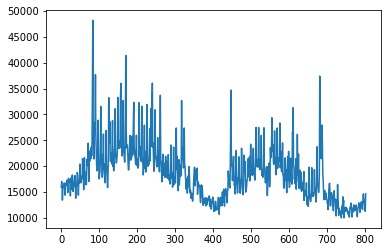

In [968]:
L = len(df)
Y = df.iloc[:,2]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

In [969]:
X1= Y[4:L-3,:]  # T-3
X2=Y[5:L-2,:]  #T-2
X3=Y[6:L-1,:]   #T-1
X4=Y[0:L-7,:]# lag 7 days seasonality
X5=Y[0:L-30,:]# lag 30 days seasonality
Y = Y[7:L,:]
X= np.concatenate([X1,X2,X3,X4],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

X shape is (796, 4)
Y shape is (796, 1)


In [970]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))

In [971]:
X_train = X[:700,:,:]
X_test= X[700:,:,:]
Y_train=Y[:700,:]
Y_test=Y[700:,:]

Stacked LSTM

In [893]:
model = Sequential()
model.add(LSTM(100,activation = 'elu',input_shape =(1,4),return_sequences=True,recurrent_activation= 'hard_sigmoid'))
model.add(Dropout(rate=0.2))
model.add(LSTM(50,activation = 'elu',return_sequences=True,recurrent_activation= 'hard_sigmoid'))
model.add(Dropout(rate=0.2))
model.add(LSTM(25,activation = 'elu',return_sequences=True,recurrent_activation= 'hard_sigmoid'))
model.add(Dropout(rate=0.2))
model.add(Dense(1))

Single LSTM

In [912]:
model = Sequential()
model.add(LSTM(100,activation = 'elu',input_shape =(1,4),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

In [913]:
optimizer = keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss="mae",optimizer = optimizer, metrics=[metrics.mape])
model.fit(X_train,Y_train,validation_split=0.2,epochs=1000,verbose=2)

Epoch 1/1000
18/18 - 3s - loss: 0.2429 - mean_absolute_percentage_error: 95.6936 - val_loss: 0.1927 - val_mean_absolute_percentage_error: 92.3342 - 3s/epoch - 145ms/step
Epoch 2/1000
18/18 - 0s - loss: 0.2312 - mean_absolute_percentage_error: 90.0954 - val_loss: 0.1813 - val_mean_absolute_percentage_error: 85.6001 - 74ms/epoch - 4ms/step
Epoch 3/1000
18/18 - 0s - loss: 0.2185 - mean_absolute_percentage_error: 83.9104 - val_loss: 0.1694 - val_mean_absolute_percentage_error: 78.6212 - 76ms/epoch - 4ms/step
Epoch 4/1000
18/18 - 0s - loss: 0.2054 - mean_absolute_percentage_error: 77.8477 - val_loss: 0.1572 - val_mean_absolute_percentage_error: 71.4867 - 74ms/epoch - 4ms/step
Epoch 5/1000
18/18 - 0s - loss: 0.1922 - mean_absolute_percentage_error: 71.6393 - val_loss: 0.1448 - val_mean_absolute_percentage_error: 64.2316 - 72ms/epoch - 4ms/step
Epoch 6/1000
18/18 - 0s - loss: 0.1786 - mean_absolute_percentage_error: 65.4902 - val_loss: 0.1322 - val_mean_absolute_percentage_error: 57.0885 - 73

Epoch 49/1000
18/18 - 0s - loss: 0.0567 - mean_absolute_percentage_error: 26.7693 - val_loss: 0.0612 - val_mean_absolute_percentage_error: 34.9923 - 72ms/epoch - 4ms/step
Epoch 50/1000
18/18 - 0s - loss: 0.0565 - mean_absolute_percentage_error: 26.4585 - val_loss: 0.0608 - val_mean_absolute_percentage_error: 34.5466 - 76ms/epoch - 4ms/step
Epoch 51/1000
18/18 - 0s - loss: 0.0563 - mean_absolute_percentage_error: 26.1835 - val_loss: 0.0604 - val_mean_absolute_percentage_error: 34.2117 - 69ms/epoch - 4ms/step
Epoch 52/1000
18/18 - 0s - loss: 0.0561 - mean_absolute_percentage_error: 25.9540 - val_loss: 0.0603 - val_mean_absolute_percentage_error: 34.0650 - 73ms/epoch - 4ms/step
Epoch 53/1000
18/18 - 0s - loss: 0.0560 - mean_absolute_percentage_error: 25.8248 - val_loss: 0.0602 - val_mean_absolute_percentage_error: 34.0128 - 71ms/epoch - 4ms/step
Epoch 54/1000
18/18 - 0s - loss: 0.0558 - mean_absolute_percentage_error: 25.7781 - val_loss: 0.0601 - val_mean_absolute_percentage_error: 33.917

Epoch 97/1000
18/18 - 0s - loss: 0.0515 - mean_absolute_percentage_error: 21.3129 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 28.0683 - 71ms/epoch - 4ms/step
Epoch 98/1000
18/18 - 0s - loss: 0.0515 - mean_absolute_percentage_error: 21.3604 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 28.1334 - 70ms/epoch - 4ms/step
Epoch 99/1000
18/18 - 0s - loss: 0.0514 - mean_absolute_percentage_error: 21.2444 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 28.1863 - 70ms/epoch - 4ms/step
Epoch 100/1000
18/18 - 0s - loss: 0.0514 - mean_absolute_percentage_error: 21.2882 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 28.2410 - 68ms/epoch - 4ms/step
Epoch 101/1000
18/18 - 0s - loss: 0.0513 - mean_absolute_percentage_error: 21.2331 - val_loss: 0.0542 - val_mean_absolute_percentage_error: 28.1387 - 72ms/epoch - 4ms/step
Epoch 102/1000
18/18 - 0s - loss: 0.0512 - mean_absolute_percentage_error: 21.1794 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 27.

Epoch 145/1000
18/18 - 0s - loss: 0.0496 - mean_absolute_percentage_error: 20.3358 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6227 - 69ms/epoch - 4ms/step
Epoch 146/1000
18/18 - 0s - loss: 0.0496 - mean_absolute_percentage_error: 20.3342 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6213 - 72ms/epoch - 4ms/step
Epoch 147/1000
18/18 - 0s - loss: 0.0496 - mean_absolute_percentage_error: 20.3331 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6565 - 72ms/epoch - 4ms/step
Epoch 148/1000
18/18 - 0s - loss: 0.0496 - mean_absolute_percentage_error: 20.3507 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 27.5137 - 69ms/epoch - 4ms/step
Epoch 149/1000
18/18 - 0s - loss: 0.0495 - mean_absolute_percentage_error: 20.2753 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.8638 - 78ms/epoch - 4ms/step
Epoch 150/1000
18/18 - 0s - loss: 0.0495 - mean_absolute_percentage_error: 20.3445 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 193/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.1385 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.8263 - 70ms/epoch - 4ms/step
Epoch 194/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.1148 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6760 - 71ms/epoch - 4ms/step
Epoch 195/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.1611 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.7344 - 74ms/epoch - 4ms/step
Epoch 196/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 19.9910 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6525 - 72ms/epoch - 4ms/step
Epoch 197/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.0784 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.9173 - 71ms/epoch - 4ms/step
Epoch 198/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.0475 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 241/1000
18/18 - 0s - loss: 0.0487 - mean_absolute_percentage_error: 20.1212 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.8469 - 73ms/epoch - 4ms/step
Epoch 242/1000
18/18 - 0s - loss: 0.0487 - mean_absolute_percentage_error: 19.8643 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.5812 - 74ms/epoch - 4ms/step
Epoch 243/1000
18/18 - 0s - loss: 0.0486 - mean_absolute_percentage_error: 19.7895 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.7369 - 75ms/epoch - 4ms/step
Epoch 244/1000
18/18 - 0s - loss: 0.0486 - mean_absolute_percentage_error: 19.9259 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7879 - 73ms/epoch - 4ms/step
Epoch 245/1000
18/18 - 0s - loss: 0.0486 - mean_absolute_percentage_error: 19.9207 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6093 - 67ms/epoch - 4ms/step
Epoch 246/1000
18/18 - 0s - loss: 0.0486 - mean_absolute_percentage_error: 19.8400 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 

Epoch 289/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8263 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7750 - 69ms/epoch - 4ms/step
Epoch 290/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8569 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.6552 - 69ms/epoch - 4ms/step
Epoch 291/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8183 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.9453 - 70ms/epoch - 4ms/step
Epoch 292/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8341 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.2044 - 69ms/epoch - 4ms/step
Epoch 293/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 20.0084 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 28.2127 - 78ms/epoch - 4ms/step
Epoch 294/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8941 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 337/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.6993 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8258 - 73ms/epoch - 4ms/step
Epoch 338/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.7983 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8048 - 72ms/epoch - 4ms/step
Epoch 339/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.7179 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.8040 - 70ms/epoch - 4ms/step
Epoch 340/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.9417 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 28.0054 - 70ms/epoch - 4ms/step
Epoch 341/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.7324 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7652 - 69ms/epoch - 4ms/step
Epoch 342/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8736 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 385/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6165 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 28.0239 - 70ms/epoch - 4ms/step
Epoch 386/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.9015 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.1507 - 68ms/epoch - 4ms/step
Epoch 387/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7806 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9633 - 69ms/epoch - 4ms/step
Epoch 388/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7790 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9212 - 69ms/epoch - 4ms/step
Epoch 389/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7339 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9253 - 70ms/epoch - 4ms/step
Epoch 390/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7686 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 433/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7217 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9462 - 71ms/epoch - 4ms/step
Epoch 434/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7406 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8873 - 70ms/epoch - 4ms/step
Epoch 435/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7514 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7302 - 70ms/epoch - 4ms/step
Epoch 436/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6372 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8782 - 74ms/epoch - 4ms/step
Epoch 437/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7195 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8850 - 75ms/epoch - 4ms/step
Epoch 438/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.5991 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 481/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7386 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9695 - 66ms/epoch - 4ms/step
Epoch 482/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6362 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6906 - 67ms/epoch - 4ms/step
Epoch 483/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6555 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8854 - 69ms/epoch - 4ms/step
Epoch 484/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7654 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8697 - 67ms/epoch - 4ms/step
Epoch 485/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6046 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6706 - 75ms/epoch - 4ms/step
Epoch 486/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6156 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 529/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7095 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0127 - 72ms/epoch - 4ms/step
Epoch 530/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6405 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9113 - 69ms/epoch - 4ms/step
Epoch 531/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7011 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9850 - 69ms/epoch - 4ms/step
Epoch 532/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6676 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7666 - 72ms/epoch - 4ms/step
Epoch 533/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.5990 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6414 - 75ms/epoch - 4ms/step
Epoch 534/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6219 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 577/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5346 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7820 - 73ms/epoch - 4ms/step
Epoch 578/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5755 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8943 - 75ms/epoch - 4ms/step
Epoch 579/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.6070 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8938 - 73ms/epoch - 4ms/step
Epoch 580/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4659 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6800 - 76ms/epoch - 4ms/step
Epoch 581/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5338 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7572 - 70ms/epoch - 4ms/step
Epoch 582/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5286 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 

Epoch 625/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5005 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0270 - 73ms/epoch - 4ms/step
Epoch 626/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5935 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9361 - 73ms/epoch - 4ms/step
Epoch 627/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.6244 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9207 - 72ms/epoch - 4ms/step
Epoch 628/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4711 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6760 - 72ms/epoch - 4ms/step
Epoch 629/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5523 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8949 - 70ms/epoch - 4ms/step
Epoch 630/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4909 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 673/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5043 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8625 - 70ms/epoch - 4ms/step
Epoch 674/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.6193 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8332 - 72ms/epoch - 4ms/step
Epoch 675/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3588 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.4633 - 70ms/epoch - 4ms/step
Epoch 676/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4207 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6800 - 69ms/epoch - 4ms/step
Epoch 677/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4563 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7974 - 72ms/epoch - 4ms/step
Epoch 678/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4444 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 721/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4996 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6318 - 73ms/epoch - 4ms/step
Epoch 722/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4527 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8344 - 68ms/epoch - 4ms/step
Epoch 723/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3926 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7418 - 66ms/epoch - 4ms/step
Epoch 724/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5426 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0083 - 69ms/epoch - 4ms/step
Epoch 725/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.6109 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8472 - 68ms/epoch - 4ms/step
Epoch 726/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3231 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 

Epoch 769/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5408 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8979 - 69ms/epoch - 4ms/step
Epoch 770/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3718 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6169 - 68ms/epoch - 4ms/step
Epoch 771/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4216 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8763 - 68ms/epoch - 4ms/step
Epoch 772/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4670 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7468 - 71ms/epoch - 4ms/step
Epoch 773/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3300 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8194 - 72ms/epoch - 4ms/step
Epoch 774/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5921 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 

Epoch 817/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3091 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5681 - 70ms/epoch - 4ms/step
Epoch 818/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3867 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8354 - 68ms/epoch - 4ms/step
Epoch 819/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4397 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6730 - 69ms/epoch - 4ms/step
Epoch 820/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3341 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7350 - 68ms/epoch - 4ms/step
Epoch 821/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.2925 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7206 - 69ms/epoch - 4ms/step
Epoch 822/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4692 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 

Epoch 865/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3538 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8049 - 69ms/epoch - 4ms/step
Epoch 866/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.5322 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 27.9582 - 68ms/epoch - 4ms/step
Epoch 867/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4150 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6519 - 71ms/epoch - 4ms/step
Epoch 868/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.2832 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6545 - 68ms/epoch - 4ms/step
Epoch 869/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3464 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 27.9782 - 67ms/epoch - 4ms/step
Epoch 870/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3454 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 913/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4388 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8053 - 71ms/epoch - 4ms/step
Epoch 914/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.2470 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5602 - 67ms/epoch - 4ms/step
Epoch 915/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.2928 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8880 - 72ms/epoch - 4ms/step
Epoch 916/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.3630 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8147 - 61ms/epoch - 3ms/step
Epoch 917/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.5432 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8834 - 51ms/epoch - 3ms/step
Epoch 918/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.1831 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 

Epoch 961/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.2729 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.4474 - 53ms/epoch - 3ms/step
Epoch 962/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.2314 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7038 - 55ms/epoch - 3ms/step
Epoch 963/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.3385 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6327 - 52ms/epoch - 3ms/step
Epoch 964/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3546 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8818 - 52ms/epoch - 3ms/step
Epoch 965/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.3009 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.5855 - 52ms/epoch - 3ms/step
Epoch 966/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3784 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 

### Test Evaluation

In [914]:
Predict = model.predict(X_test)

In [915]:
# if you use stakced LSTM, you should use this reshape function
#Predict= np.reshape(Predict, (Predict.shape[0],1))

In [916]:
Y_test_unscal=scaler1.inverse_transform(Y_test)
Predict_unscal=scaler1.inverse_transform(Predict)

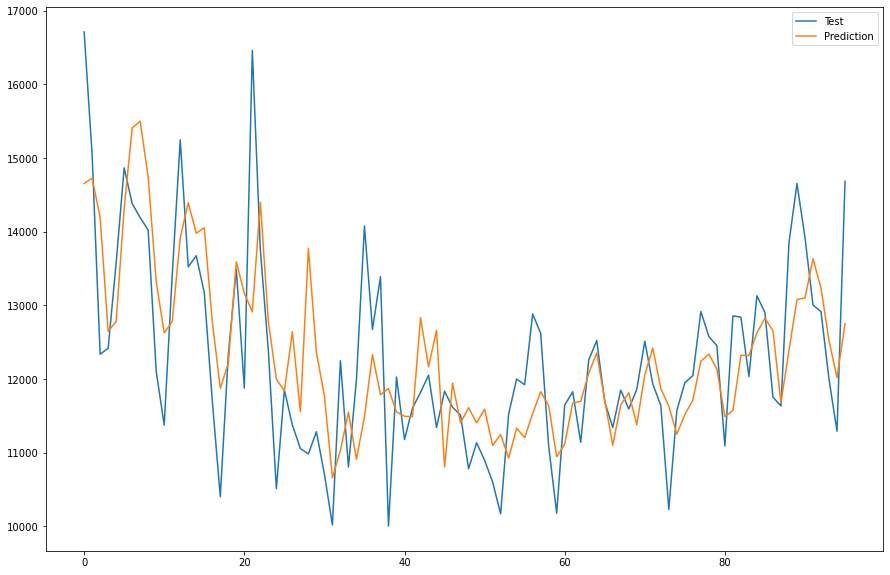

In [917]:
plt.figure(figsize=(15,10))
plt.plot(Y_test_unscal,label = 'Test')
plt.plot(Predict_unscal, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [918]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [919]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(Y_test_unscal,Predict_unscal)

1013911.9874213139

In [920]:
mean_absolute_error(Y_test_unscal,Predict_unscal)

786.5747273763021

In [923]:
np.sqrt(mean_squared_error(Y_test_unscal,Predict_unscal))

1006.9319676230931

In [922]:
MAPE(Y_test_unscal,Predict_unscal)

6.373889900981662

In [927]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_105 (LSTM)             (None, 100)               42000     
                                                                 
 dense_104 (Dense)           (None, 1)                 101       
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


Single LSTM with relu activation function and hard_sigmoid recerent activation function is the best LSTM architechture

## Multivariate Model

In [928]:
L = len(df)
Y = df.iloc[3:L,2]
Y= np.array(Y)
Y= Y.reshape(-1,1)

In [929]:
X1=df.iloc[2:L-1,3:29]
X1= np.array(X1)
X1= X1.reshape(-1,26)

X2=df.iloc[1:L-2,3:29]
X2= np.array(X2)
X2= X2.reshape(-1,26)

X3=df.iloc[0:L-3,3:29]
X3= np.array(X3)
X3= X3.reshape(-1,26)

In [930]:
X= np.concatenate([X1,X2,X3],axis=1)

In [931]:
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

X shape is (800, 78)
Y shape is (800, 1)


In [932]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))

In [933]:
X_train = X[:700,:,:]
X_test= X[700:,:,:]
Y_train=Y[:700,:]
Y_test=Y[700:,:]

In [960]:
model = Sequential()
model.add(LSTM(300,activation = 'elu',input_shape = (1,78),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

In [961]:
model.compile(loss= 'mae',optimizer=optimizer, metrics=[metrics.mape])
model.fit(X_train,Y_train,validation_split=0.2,epochs=1000,verbose=2)

Epoch 1/1000
18/18 - 2s - loss: 0.0985 - mean_absolute_percentage_error: 45.2289 - val_loss: 0.0742 - val_mean_absolute_percentage_error: 30.2173 - 2s/epoch - 108ms/step
Epoch 2/1000
18/18 - 0s - loss: 0.0655 - mean_absolute_percentage_error: 30.0346 - val_loss: 0.0636 - val_mean_absolute_percentage_error: 29.1750 - 149ms/epoch - 8ms/step
Epoch 3/1000
18/18 - 0s - loss: 0.0609 - mean_absolute_percentage_error: 28.2106 - val_loss: 0.0614 - val_mean_absolute_percentage_error: 27.2065 - 153ms/epoch - 8ms/step
Epoch 4/1000
18/18 - 0s - loss: 0.0587 - mean_absolute_percentage_error: 26.3206 - val_loss: 0.0599 - val_mean_absolute_percentage_error: 27.9503 - 140ms/epoch - 8ms/step
Epoch 5/1000
18/18 - 0s - loss: 0.0578 - mean_absolute_percentage_error: 25.0984 - val_loss: 0.0595 - val_mean_absolute_percentage_error: 28.0058 - 137ms/epoch - 8ms/step
Epoch 6/1000
18/18 - 0s - loss: 0.0563 - mean_absolute_percentage_error: 24.0852 - val_loss: 0.0589 - val_mean_absolute_percentage_error: 27.6049 

Epoch 49/1000
18/18 - 0s - loss: 0.0497 - mean_absolute_percentage_error: 20.0908 - val_loss: 0.0546 - val_mean_absolute_percentage_error: 24.5106 - 134ms/epoch - 7ms/step
Epoch 50/1000
18/18 - 0s - loss: 0.0497 - mean_absolute_percentage_error: 20.2500 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 23.7474 - 132ms/epoch - 7ms/step
Epoch 51/1000
18/18 - 0s - loss: 0.0496 - mean_absolute_percentage_error: 20.0086 - val_loss: 0.0545 - val_mean_absolute_percentage_error: 24.1140 - 130ms/epoch - 7ms/step
Epoch 52/1000
18/18 - 0s - loss: 0.0495 - mean_absolute_percentage_error: 20.1211 - val_loss: 0.0542 - val_mean_absolute_percentage_error: 23.4946 - 133ms/epoch - 7ms/step
Epoch 53/1000
18/18 - 0s - loss: 0.0495 - mean_absolute_percentage_error: 20.1328 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 23.2175 - 135ms/epoch - 7ms/step
Epoch 54/1000
18/18 - 0s - loss: 0.0495 - mean_absolute_percentage_error: 20.1275 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 2

Epoch 97/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.2769 - val_loss: 0.0533 - val_mean_absolute_percentage_error: 23.3351 - 146ms/epoch - 8ms/step
Epoch 98/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.1913 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 23.0841 - 135ms/epoch - 7ms/step
Epoch 99/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.1268 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 23.3190 - 138ms/epoch - 8ms/step
Epoch 100/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.0904 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 23.5039 - 136ms/epoch - 8ms/step
Epoch 101/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 18.9693 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 23.7894 - 136ms/epoch - 8ms/step
Epoch 102/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.1139 - val_loss: 0.0534 - val_mean_absolute_percentage_error

Epoch 145/1000
18/18 - 0s - loss: 0.0471 - mean_absolute_percentage_error: 18.4338 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 22.9224 - 141ms/epoch - 8ms/step
Epoch 146/1000
18/18 - 0s - loss: 0.0477 - mean_absolute_percentage_error: 18.4661 - val_loss: 0.0528 - val_mean_absolute_percentage_error: 23.1214 - 144ms/epoch - 8ms/step
Epoch 147/1000
18/18 - 0s - loss: 0.0470 - mean_absolute_percentage_error: 18.2835 - val_loss: 0.0528 - val_mean_absolute_percentage_error: 23.0391 - 148ms/epoch - 8ms/step
Epoch 148/1000
18/18 - 0s - loss: 0.0472 - mean_absolute_percentage_error: 18.3932 - val_loss: 0.0528 - val_mean_absolute_percentage_error: 23.0568 - 150ms/epoch - 8ms/step
Epoch 149/1000
18/18 - 0s - loss: 0.0471 - mean_absolute_percentage_error: 18.4888 - val_loss: 0.0532 - val_mean_absolute_percentage_error: 22.9007 - 152ms/epoch - 8ms/step
Epoch 150/1000
18/18 - 0s - loss: 0.0472 - mean_absolute_percentage_error: 18.4288 - val_loss: 0.0532 - val_mean_absolute_percentage_er

Epoch 193/1000
18/18 - 0s - loss: 0.0465 - mean_absolute_percentage_error: 17.9497 - val_loss: 0.0529 - val_mean_absolute_percentage_error: 23.4764 - 132ms/epoch - 7ms/step
Epoch 194/1000
18/18 - 0s - loss: 0.0466 - mean_absolute_percentage_error: 18.1607 - val_loss: 0.0527 - val_mean_absolute_percentage_error: 23.3171 - 130ms/epoch - 7ms/step
Epoch 195/1000
18/18 - 0s - loss: 0.0465 - mean_absolute_percentage_error: 17.8259 - val_loss: 0.0529 - val_mean_absolute_percentage_error: 23.6916 - 140ms/epoch - 8ms/step
Epoch 196/1000
18/18 - 0s - loss: 0.0465 - mean_absolute_percentage_error: 18.2358 - val_loss: 0.0528 - val_mean_absolute_percentage_error: 23.3572 - 141ms/epoch - 8ms/step
Epoch 197/1000
18/18 - 0s - loss: 0.0464 - mean_absolute_percentage_error: 18.1253 - val_loss: 0.0532 - val_mean_absolute_percentage_error: 22.9589 - 138ms/epoch - 8ms/step
Epoch 198/1000
18/18 - 0s - loss: 0.0463 - mean_absolute_percentage_error: 17.9405 - val_loss: 0.0529 - val_mean_absolute_percentage_er

Epoch 241/1000
18/18 - 0s - loss: 0.0460 - mean_absolute_percentage_error: 17.9583 - val_loss: 0.0531 - val_mean_absolute_percentage_error: 23.0622 - 142ms/epoch - 8ms/step
Epoch 242/1000
18/18 - 0s - loss: 0.0458 - mean_absolute_percentage_error: 17.6277 - val_loss: 0.0529 - val_mean_absolute_percentage_error: 23.0843 - 145ms/epoch - 8ms/step
Epoch 243/1000
18/18 - 0s - loss: 0.0458 - mean_absolute_percentage_error: 17.8669 - val_loss: 0.0532 - val_mean_absolute_percentage_error: 23.0227 - 139ms/epoch - 8ms/step
Epoch 244/1000
18/18 - 0s - loss: 0.0458 - mean_absolute_percentage_error: 17.7935 - val_loss: 0.0531 - val_mean_absolute_percentage_error: 22.9727 - 136ms/epoch - 8ms/step
Epoch 245/1000
18/18 - 0s - loss: 0.0457 - mean_absolute_percentage_error: 17.8786 - val_loss: 0.0526 - val_mean_absolute_percentage_error: 23.0840 - 130ms/epoch - 7ms/step
Epoch 246/1000
18/18 - 0s - loss: 0.0457 - mean_absolute_percentage_error: 17.9275 - val_loss: 0.0527 - val_mean_absolute_percentage_er

Epoch 289/1000
18/18 - 0s - loss: 0.0454 - mean_absolute_percentage_error: 17.6687 - val_loss: 0.0525 - val_mean_absolute_percentage_error: 22.8579 - 141ms/epoch - 8ms/step
Epoch 290/1000
18/18 - 0s - loss: 0.0450 - mean_absolute_percentage_error: 17.5613 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 22.9227 - 143ms/epoch - 8ms/step
Epoch 291/1000
18/18 - 0s - loss: 0.0453 - mean_absolute_percentage_error: 17.5522 - val_loss: 0.0524 - val_mean_absolute_percentage_error: 23.0224 - 139ms/epoch - 8ms/step
Epoch 292/1000
18/18 - 0s - loss: 0.0450 - mean_absolute_percentage_error: 17.5741 - val_loss: 0.0526 - val_mean_absolute_percentage_error: 22.8035 - 134ms/epoch - 7ms/step
Epoch 293/1000
18/18 - 0s - loss: 0.0452 - mean_absolute_percentage_error: 17.5754 - val_loss: 0.0524 - val_mean_absolute_percentage_error: 23.0703 - 150ms/epoch - 8ms/step
Epoch 294/1000
18/18 - 0s - loss: 0.0454 - mean_absolute_percentage_error: 17.8159 - val_loss: 0.0527 - val_mean_absolute_percentage_er

Epoch 337/1000
18/18 - 0s - loss: 0.0451 - mean_absolute_percentage_error: 17.7710 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 23.0211 - 144ms/epoch - 8ms/step
Epoch 338/1000
18/18 - 0s - loss: 0.0447 - mean_absolute_percentage_error: 17.4792 - val_loss: 0.0528 - val_mean_absolute_percentage_error: 22.6852 - 135ms/epoch - 7ms/step
Epoch 339/1000
18/18 - 0s - loss: 0.0449 - mean_absolute_percentage_error: 17.6065 - val_loss: 0.0529 - val_mean_absolute_percentage_error: 22.7018 - 134ms/epoch - 7ms/step
Epoch 340/1000
18/18 - 0s - loss: 0.0445 - mean_absolute_percentage_error: 17.3427 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.7088 - 131ms/epoch - 7ms/step
Epoch 341/1000
18/18 - 0s - loss: 0.0451 - mean_absolute_percentage_error: 17.5408 - val_loss: 0.0525 - val_mean_absolute_percentage_error: 22.6622 - 132ms/epoch - 7ms/step
Epoch 342/1000
18/18 - 0s - loss: 0.0444 - mean_absolute_percentage_error: 17.4173 - val_loss: 0.0529 - val_mean_absolute_percentage_er

Epoch 385/1000
18/18 - 0s - loss: 0.0439 - mean_absolute_percentage_error: 17.2368 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.7481 - 143ms/epoch - 8ms/step
Epoch 386/1000
18/18 - 0s - loss: 0.0441 - mean_absolute_percentage_error: 17.2845 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.6899 - 134ms/epoch - 7ms/step
Epoch 387/1000
18/18 - 0s - loss: 0.0442 - mean_absolute_percentage_error: 17.3588 - val_loss: 0.0522 - val_mean_absolute_percentage_error: 22.4533 - 138ms/epoch - 8ms/step
Epoch 388/1000
18/18 - 0s - loss: 0.0438 - mean_absolute_percentage_error: 17.1596 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.5097 - 132ms/epoch - 7ms/step
Epoch 389/1000
18/18 - 0s - loss: 0.0438 - mean_absolute_percentage_error: 17.1351 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.4591 - 136ms/epoch - 8ms/step
Epoch 390/1000
18/18 - 0s - loss: 0.0439 - mean_absolute_percentage_error: 17.1254 - val_loss: 0.0518 - val_mean_absolute_percentage_er

Epoch 433/1000
18/18 - 0s - loss: 0.0434 - mean_absolute_percentage_error: 16.9971 - val_loss: 0.0524 - val_mean_absolute_percentage_error: 22.3510 - 139ms/epoch - 8ms/step
Epoch 434/1000
18/18 - 0s - loss: 0.0434 - mean_absolute_percentage_error: 17.0634 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.3965 - 133ms/epoch - 7ms/step
Epoch 435/1000
18/18 - 0s - loss: 0.0432 - mean_absolute_percentage_error: 16.8434 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.3242 - 144ms/epoch - 8ms/step
Epoch 436/1000
18/18 - 0s - loss: 0.0432 - mean_absolute_percentage_error: 16.9337 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.3681 - 141ms/epoch - 8ms/step
Epoch 437/1000
18/18 - 0s - loss: 0.0434 - mean_absolute_percentage_error: 16.9306 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.8104 - 137ms/epoch - 8ms/step
Epoch 438/1000
18/18 - 0s - loss: 0.0434 - mean_absolute_percentage_error: 17.0152 - val_loss: 0.0520 - val_mean_absolute_percentage_er

Epoch 481/1000
18/18 - 0s - loss: 0.0429 - mean_absolute_percentage_error: 16.7957 - val_loss: 0.0522 - val_mean_absolute_percentage_error: 22.4077 - 135ms/epoch - 7ms/step
Epoch 482/1000
18/18 - 0s - loss: 0.0428 - mean_absolute_percentage_error: 16.7090 - val_loss: 0.0524 - val_mean_absolute_percentage_error: 22.4429 - 134ms/epoch - 7ms/step
Epoch 483/1000
18/18 - 0s - loss: 0.0427 - mean_absolute_percentage_error: 16.7757 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.9331 - 130ms/epoch - 7ms/step
Epoch 484/1000
18/18 - 0s - loss: 0.0431 - mean_absolute_percentage_error: 16.7952 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.3722 - 159ms/epoch - 9ms/step
Epoch 485/1000
18/18 - 0s - loss: 0.0427 - mean_absolute_percentage_error: 16.7882 - val_loss: 0.0524 - val_mean_absolute_percentage_error: 22.4343 - 147ms/epoch - 8ms/step
Epoch 486/1000
18/18 - 0s - loss: 0.0428 - mean_absolute_percentage_error: 16.6655 - val_loss: 0.0520 - val_mean_absolute_percentage_er

Epoch 529/1000
18/18 - 0s - loss: 0.0424 - mean_absolute_percentage_error: 16.6250 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.4820 - 134ms/epoch - 7ms/step
Epoch 530/1000
18/18 - 0s - loss: 0.0421 - mean_absolute_percentage_error: 16.4260 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.8120 - 134ms/epoch - 7ms/step
Epoch 531/1000
18/18 - 0s - loss: 0.0423 - mean_absolute_percentage_error: 16.4764 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.7730 - 135ms/epoch - 8ms/step
Epoch 532/1000
18/18 - 0s - loss: 0.0421 - mean_absolute_percentage_error: 16.4900 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.6138 - 138ms/epoch - 8ms/step
Epoch 533/1000
18/18 - 0s - loss: 0.0423 - mean_absolute_percentage_error: 16.4580 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.6453 - 135ms/epoch - 7ms/step
Epoch 534/1000
18/18 - 0s - loss: 0.0425 - mean_absolute_percentage_error: 16.7836 - val_loss: 0.0525 - val_mean_absolute_percentage_er

Epoch 577/1000
18/18 - 0s - loss: 0.0417 - mean_absolute_percentage_error: 16.2287 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.4812 - 147ms/epoch - 8ms/step
Epoch 578/1000
18/18 - 0s - loss: 0.0416 - mean_absolute_percentage_error: 16.2432 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.4755 - 148ms/epoch - 8ms/step
Epoch 579/1000
18/18 - 0s - loss: 0.0417 - mean_absolute_percentage_error: 16.3074 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.5157 - 134ms/epoch - 7ms/step
Epoch 580/1000
18/18 - 0s - loss: 0.0417 - mean_absolute_percentage_error: 16.2696 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.4725 - 134ms/epoch - 7ms/step
Epoch 581/1000
18/18 - 0s - loss: 0.0415 - mean_absolute_percentage_error: 16.1738 - val_loss: 0.0515 - val_mean_absolute_percentage_error: 22.5474 - 130ms/epoch - 7ms/step
Epoch 582/1000
18/18 - 0s - loss: 0.0418 - mean_absolute_percentage_error: 16.2688 - val_loss: 0.0516 - val_mean_absolute_percentage_er

Epoch 625/1000
18/18 - 0s - loss: 0.0412 - mean_absolute_percentage_error: 16.0947 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.3306 - 146ms/epoch - 8ms/step
Epoch 626/1000
18/18 - 0s - loss: 0.0411 - mean_absolute_percentage_error: 16.0028 - val_loss: 0.0515 - val_mean_absolute_percentage_error: 22.7737 - 135ms/epoch - 8ms/step
Epoch 627/1000
18/18 - 0s - loss: 0.0412 - mean_absolute_percentage_error: 16.1418 - val_loss: 0.0522 - val_mean_absolute_percentage_error: 22.4298 - 133ms/epoch - 7ms/step
Epoch 628/1000
18/18 - 0s - loss: 0.0412 - mean_absolute_percentage_error: 16.0978 - val_loss: 0.0525 - val_mean_absolute_percentage_error: 22.4425 - 131ms/epoch - 7ms/step
Epoch 629/1000
18/18 - 0s - loss: 0.0412 - mean_absolute_percentage_error: 16.0468 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.6252 - 131ms/epoch - 7ms/step
Epoch 630/1000
18/18 - 0s - loss: 0.0412 - mean_absolute_percentage_error: 16.1025 - val_loss: 0.0517 - val_mean_absolute_percentage_er

Epoch 673/1000
18/18 - 0s - loss: 0.0407 - mean_absolute_percentage_error: 15.9531 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.4466 - 138ms/epoch - 8ms/step
Epoch 674/1000
18/18 - 0s - loss: 0.0407 - mean_absolute_percentage_error: 15.9309 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.5872 - 140ms/epoch - 8ms/step
Epoch 675/1000
18/18 - 0s - loss: 0.0406 - mean_absolute_percentage_error: 15.8793 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.5060 - 138ms/epoch - 8ms/step
Epoch 676/1000
18/18 - 0s - loss: 0.0407 - mean_absolute_percentage_error: 15.9764 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.3671 - 139ms/epoch - 8ms/step
Epoch 677/1000
18/18 - 0s - loss: 0.0409 - mean_absolute_percentage_error: 15.8777 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.6512 - 134ms/epoch - 7ms/step
Epoch 678/1000
18/18 - 0s - loss: 0.0406 - mean_absolute_percentage_error: 15.8904 - val_loss: 0.0519 - val_mean_absolute_percentage_er

Epoch 721/1000
18/18 - 0s - loss: 0.0403 - mean_absolute_percentage_error: 15.8274 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.4660 - 159ms/epoch - 9ms/step
Epoch 722/1000
18/18 - 0s - loss: 0.0403 - mean_absolute_percentage_error: 15.7900 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.5807 - 146ms/epoch - 8ms/step
Epoch 723/1000
18/18 - 0s - loss: 0.0401 - mean_absolute_percentage_error: 15.6834 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.5048 - 149ms/epoch - 8ms/step
Epoch 724/1000
18/18 - 0s - loss: 0.0401 - mean_absolute_percentage_error: 15.7584 - val_loss: 0.0515 - val_mean_absolute_percentage_error: 22.5421 - 170ms/epoch - 9ms/step
Epoch 725/1000
18/18 - 0s - loss: 0.0402 - mean_absolute_percentage_error: 15.8063 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.4116 - 149ms/epoch - 8ms/step
Epoch 726/1000
18/18 - 0s - loss: 0.0402 - mean_absolute_percentage_error: 15.7671 - val_loss: 0.0522 - val_mean_absolute_percentage_er

Epoch 769/1000
18/18 - 0s - loss: 0.0397 - mean_absolute_percentage_error: 15.6255 - val_loss: 0.0516 - val_mean_absolute_percentage_error: 22.6773 - 136ms/epoch - 8ms/step
Epoch 770/1000
18/18 - 0s - loss: 0.0399 - mean_absolute_percentage_error: 15.7127 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.4640 - 147ms/epoch - 8ms/step
Epoch 771/1000
18/18 - 0s - loss: 0.0398 - mean_absolute_percentage_error: 15.5940 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.4884 - 145ms/epoch - 8ms/step
Epoch 772/1000
18/18 - 0s - loss: 0.0398 - mean_absolute_percentage_error: 15.6528 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.5115 - 138ms/epoch - 8ms/step
Epoch 773/1000
18/18 - 0s - loss: 0.0400 - mean_absolute_percentage_error: 15.7319 - val_loss: 0.0522 - val_mean_absolute_percentage_error: 22.4827 - 135ms/epoch - 7ms/step
Epoch 774/1000
18/18 - 0s - loss: 0.0396 - mean_absolute_percentage_error: 15.5932 - val_loss: 0.0518 - val_mean_absolute_percentage_er

Epoch 817/1000
18/18 - 0s - loss: 0.0394 - mean_absolute_percentage_error: 15.5054 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.4469 - 137ms/epoch - 8ms/step
Epoch 818/1000
18/18 - 0s - loss: 0.0395 - mean_absolute_percentage_error: 15.4267 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.5319 - 131ms/epoch - 7ms/step
Epoch 819/1000
18/18 - 0s - loss: 0.0395 - mean_absolute_percentage_error: 15.5975 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.6986 - 130ms/epoch - 7ms/step
Epoch 820/1000
18/18 - 0s - loss: 0.0397 - mean_absolute_percentage_error: 15.6553 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.4960 - 130ms/epoch - 7ms/step
Epoch 821/1000
18/18 - 0s - loss: 0.0394 - mean_absolute_percentage_error: 15.5503 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.5090 - 140ms/epoch - 8ms/step
Epoch 822/1000
18/18 - 0s - loss: 0.0393 - mean_absolute_percentage_error: 15.4660 - val_loss: 0.0517 - val_mean_absolute_percentage_er

Epoch 865/1000
18/18 - 0s - loss: 0.0390 - mean_absolute_percentage_error: 15.4556 - val_loss: 0.0518 - val_mean_absolute_percentage_error: 22.6110 - 127ms/epoch - 7ms/step
Epoch 866/1000
18/18 - 0s - loss: 0.0391 - mean_absolute_percentage_error: 15.3771 - val_loss: 0.0514 - val_mean_absolute_percentage_error: 22.6748 - 130ms/epoch - 7ms/step
Epoch 867/1000
18/18 - 0s - loss: 0.0391 - mean_absolute_percentage_error: 15.4814 - val_loss: 0.0515 - val_mean_absolute_percentage_error: 22.6611 - 135ms/epoch - 8ms/step
Epoch 868/1000
18/18 - 0s - loss: 0.0390 - mean_absolute_percentage_error: 15.4467 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.6059 - 142ms/epoch - 8ms/step
Epoch 869/1000
18/18 - 0s - loss: 0.0389 - mean_absolute_percentage_error: 15.3517 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.5856 - 156ms/epoch - 9ms/step
Epoch 870/1000
18/18 - 0s - loss: 0.0390 - mean_absolute_percentage_error: 15.4255 - val_loss: 0.0518 - val_mean_absolute_percentage_er

Epoch 913/1000
18/18 - 0s - loss: 0.0386 - mean_absolute_percentage_error: 15.2371 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.7493 - 146ms/epoch - 8ms/step
Epoch 914/1000
18/18 - 0s - loss: 0.0386 - mean_absolute_percentage_error: 15.3369 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 22.7713 - 138ms/epoch - 8ms/step
Epoch 915/1000
18/18 - 0s - loss: 0.0386 - mean_absolute_percentage_error: 15.3049 - val_loss: 0.0523 - val_mean_absolute_percentage_error: 22.8034 - 141ms/epoch - 8ms/step
Epoch 916/1000
18/18 - 0s - loss: 0.0387 - mean_absolute_percentage_error: 15.2593 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 22.7432 - 143ms/epoch - 8ms/step
Epoch 917/1000
18/18 - 0s - loss: 0.0387 - mean_absolute_percentage_error: 15.2688 - val_loss: 0.0517 - val_mean_absolute_percentage_error: 22.8317 - 133ms/epoch - 7ms/step
Epoch 918/1000
18/18 - 0s - loss: 0.0386 - mean_absolute_percentage_error: 15.2410 - val_loss: 0.0517 - val_mean_absolute_percentage_er

Epoch 961/1000
18/18 - 0s - loss: 0.0382 - mean_absolute_percentage_error: 15.1589 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.7500 - 133ms/epoch - 7ms/step
Epoch 962/1000
18/18 - 0s - loss: 0.0384 - mean_absolute_percentage_error: 15.3134 - val_loss: 0.0530 - val_mean_absolute_percentage_error: 22.9277 - 138ms/epoch - 8ms/step
Epoch 963/1000
18/18 - 0s - loss: 0.0384 - mean_absolute_percentage_error: 15.1770 - val_loss: 0.0515 - val_mean_absolute_percentage_error: 22.7891 - 140ms/epoch - 8ms/step
Epoch 964/1000
18/18 - 0s - loss: 0.0385 - mean_absolute_percentage_error: 15.3807 - val_loss: 0.0521 - val_mean_absolute_percentage_error: 22.7185 - 140ms/epoch - 8ms/step
Epoch 965/1000
18/18 - 0s - loss: 0.0382 - mean_absolute_percentage_error: 15.1208 - val_loss: 0.0522 - val_mean_absolute_percentage_error: 22.7860 - 132ms/epoch - 7ms/step
Epoch 966/1000
18/18 - 0s - loss: 0.0382 - mean_absolute_percentage_error: 15.1154 - val_loss: 0.0516 - val_mean_absolute_percentage_er

### Test Validation

In [962]:
Predict = model.predict(X_test)

In [963]:
Y_test_unscal=scaler1.inverse_transform(Y_test)
Predict_unscal=scaler1.inverse_transform(Predict)
Y_train_unscal=scaler1.inverse_transform(Y_train)

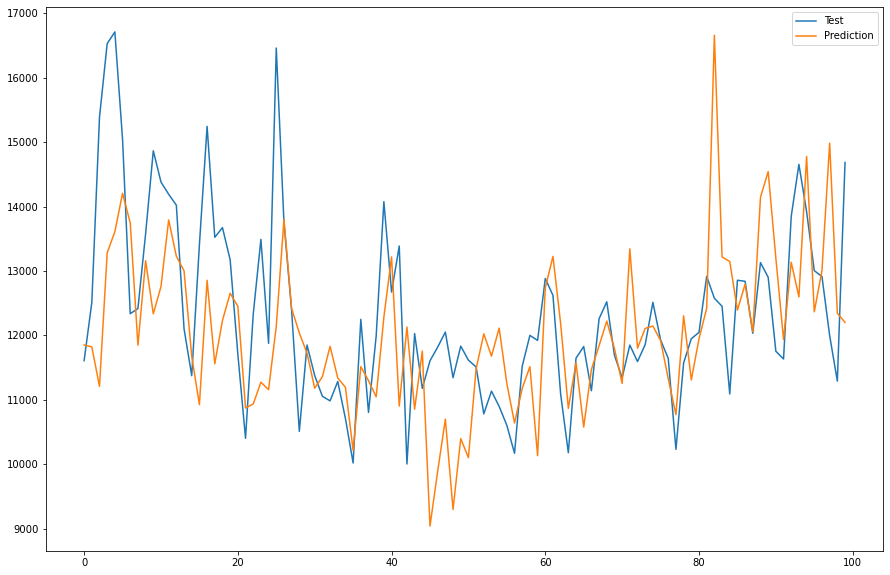

In [964]:
plt.figure(figsize=(15,10))
plt.plot(Y_test_unscal,label = 'Test')
plt.plot(Predict_unscal, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [965]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test_unscal,Predict_unscal)

2039202.8709491445

In [966]:
np.sqrt(6359269)

2521.7591082417052

In [967]:
MAPE(Y_test_unscal,Predict_unscal)

8.241077742229828

## GRU 

In [972]:
model = Sequential()
model.add(GRU(50,activation = 'elu',input_shape =(1,4),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

In [973]:
optimizer = keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss="mae",optimizer = optimizer, metrics=[metrics.mape])
model.fit(X_train,Y_train,validation_split=0.2,epochs=1000,verbose=2)

Epoch 1/1000
18/18 - 2s - loss: 0.2752 - mean_absolute_percentage_error: 109.1643 - val_loss: 0.2153 - val_mean_absolute_percentage_error: 104.0095 - 2s/epoch - 91ms/step
Epoch 2/1000
18/18 - 0s - loss: 0.2551 - mean_absolute_percentage_error: 99.1641 - val_loss: 0.1953 - val_mean_absolute_percentage_error: 92.2029 - 52ms/epoch - 3ms/step
Epoch 3/1000
18/18 - 0s - loss: 0.2333 - mean_absolute_percentage_error: 88.7742 - val_loss: 0.1747 - val_mean_absolute_percentage_error: 80.0167 - 49ms/epoch - 3ms/step
Epoch 4/1000
18/18 - 0s - loss: 0.2111 - mean_absolute_percentage_error: 78.2615 - val_loss: 0.1540 - val_mean_absolute_percentage_error: 67.9621 - 47ms/epoch - 3ms/step
Epoch 5/1000
18/18 - 0s - loss: 0.1892 - mean_absolute_percentage_error: 68.7138 - val_loss: 0.1336 - val_mean_absolute_percentage_error: 56.4465 - 44ms/epoch - 2ms/step
Epoch 6/1000
18/18 - 0s - loss: 0.1679 - mean_absolute_percentage_error: 59.9044 - val_loss: 0.1145 - val_mean_absolute_percentage_error: 46.7630 - 4

Epoch 49/1000
18/18 - 0s - loss: 0.0565 - mean_absolute_percentage_error: 26.6864 - val_loss: 0.0608 - val_mean_absolute_percentage_error: 34.9907 - 47ms/epoch - 3ms/step
Epoch 50/1000
18/18 - 0s - loss: 0.0562 - mean_absolute_percentage_error: 26.5034 - val_loss: 0.0602 - val_mean_absolute_percentage_error: 34.3459 - 45ms/epoch - 3ms/step
Epoch 51/1000
18/18 - 0s - loss: 0.0559 - mean_absolute_percentage_error: 25.9342 - val_loss: 0.0596 - val_mean_absolute_percentage_error: 33.7340 - 49ms/epoch - 3ms/step
Epoch 52/1000
18/18 - 0s - loss: 0.0556 - mean_absolute_percentage_error: 25.6597 - val_loss: 0.0593 - val_mean_absolute_percentage_error: 33.4775 - 48ms/epoch - 3ms/step
Epoch 53/1000
18/18 - 0s - loss: 0.0554 - mean_absolute_percentage_error: 25.3469 - val_loss: 0.0592 - val_mean_absolute_percentage_error: 33.3576 - 46ms/epoch - 3ms/step
Epoch 54/1000
18/18 - 0s - loss: 0.0551 - mean_absolute_percentage_error: 25.3874 - val_loss: 0.0589 - val_mean_absolute_percentage_error: 33.081

Epoch 97/1000
18/18 - 0s - loss: 0.0504 - mean_absolute_percentage_error: 20.6137 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7239 - 49ms/epoch - 3ms/step
Epoch 98/1000
18/18 - 0s - loss: 0.0503 - mean_absolute_percentage_error: 20.4846 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 27.3767 - 48ms/epoch - 3ms/step
Epoch 99/1000
18/18 - 0s - loss: 0.0502 - mean_absolute_percentage_error: 20.4687 - val_loss: 0.0531 - val_mean_absolute_percentage_error: 26.9702 - 48ms/epoch - 3ms/step
Epoch 100/1000
18/18 - 0s - loss: 0.0502 - mean_absolute_percentage_error: 20.3964 - val_loss: 0.0532 - val_mean_absolute_percentage_error: 27.1567 - 48ms/epoch - 3ms/step
Epoch 101/1000
18/18 - 0s - loss: 0.0501 - mean_absolute_percentage_error: 20.3174 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.8480 - 48ms/epoch - 3ms/step
Epoch 102/1000
18/18 - 0s - loss: 0.0501 - mean_absolute_percentage_error: 20.4213 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.

Epoch 145/1000
18/18 - 0s - loss: 0.0490 - mean_absolute_percentage_error: 20.0853 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.7470 - 45ms/epoch - 3ms/step
Epoch 146/1000
18/18 - 0s - loss: 0.0490 - mean_absolute_percentage_error: 20.1621 - val_loss: 0.0533 - val_mean_absolute_percentage_error: 27.6043 - 41ms/epoch - 2ms/step
Epoch 147/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 19.8814 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 27.6406 - 43ms/epoch - 2ms/step
Epoch 148/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.0666 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 27.6305 - 45ms/epoch - 3ms/step
Epoch 149/1000
18/18 - 0s - loss: 0.0490 - mean_absolute_percentage_error: 19.8875 - val_loss: 0.0533 - val_mean_absolute_percentage_error: 27.5929 - 46ms/epoch - 3ms/step
Epoch 150/1000
18/18 - 0s - loss: 0.0489 - mean_absolute_percentage_error: 20.0276 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 

Epoch 193/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8995 - val_loss: 0.0534 - val_mean_absolute_percentage_error: 27.5174 - 47ms/epoch - 3ms/step
Epoch 194/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.6669 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6436 - 46ms/epoch - 3ms/step
Epoch 195/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8446 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.6850 - 46ms/epoch - 3ms/step
Epoch 196/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.7042 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.8571 - 48ms/epoch - 3ms/step
Epoch 197/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.6636 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 28.1137 - 50ms/epoch - 3ms/step
Epoch 198/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.9571 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 241/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6081 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7631 - 50ms/epoch - 3ms/step
Epoch 242/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.8523 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.4844 - 49ms/epoch - 3ms/step
Epoch 243/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6200 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.5193 - 48ms/epoch - 3ms/step
Epoch 244/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6317 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.6723 - 50ms/epoch - 3ms/step
Epoch 245/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6112 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 28.0731 - 49ms/epoch - 3ms/step
Epoch 246/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.9485 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 289/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.8258 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.1591 - 46ms/epoch - 3ms/step
Epoch 290/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.8729 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9425 - 44ms/epoch - 2ms/step
Epoch 291/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.5957 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9887 - 48ms/epoch - 3ms/step
Epoch 292/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.9748 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 28.1929 - 48ms/epoch - 3ms/step
Epoch 293/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.8116 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6432 - 48ms/epoch - 3ms/step
Epoch 294/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.4636 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 337/1000
18/18 - 0s - loss: 0.0485 - mean_absolute_percentage_error: 19.4370 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8808 - 51ms/epoch - 3ms/step
Epoch 338/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.7709 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0058 - 48ms/epoch - 3ms/step
Epoch 339/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6638 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8230 - 51ms/epoch - 3ms/step
Epoch 340/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.5968 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7614 - 46ms/epoch - 3ms/step
Epoch 341/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.8849 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6350 - 48ms/epoch - 3ms/step
Epoch 342/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.5533 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 385/1000
18/18 - 0s - loss: 0.0484 - mean_absolute_percentage_error: 19.6191 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.1346 - 49ms/epoch - 3ms/step
Epoch 386/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7180 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9737 - 48ms/epoch - 3ms/step
Epoch 387/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.5462 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0328 - 47ms/epoch - 3ms/step
Epoch 388/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.8113 - val_loss: 0.0542 - val_mean_absolute_percentage_error: 28.3512 - 46ms/epoch - 3ms/step
Epoch 389/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7053 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 28.1915 - 46ms/epoch - 3ms/step
Epoch 390/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.8376 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 433/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.4441 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6221 - 49ms/epoch - 3ms/step
Epoch 434/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.5126 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8760 - 48ms/epoch - 3ms/step
Epoch 435/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6384 - val_loss: 0.0542 - val_mean_absolute_percentage_error: 28.3138 - 50ms/epoch - 3ms/step
Epoch 436/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7943 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8520 - 53ms/epoch - 3ms/step
Epoch 437/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6064 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7292 - 44ms/epoch - 2ms/step
Epoch 438/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.5384 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 

Epoch 481/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6170 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0126 - 45ms/epoch - 2ms/step
Epoch 482/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.6334 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7825 - 47ms/epoch - 3ms/step
Epoch 483/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5369 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5125 - 49ms/epoch - 3ms/step
Epoch 484/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.4316 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9322 - 50ms/epoch - 3ms/step
Epoch 485/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.7782 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8975 - 47ms/epoch - 3ms/step
Epoch 486/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.6240 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 529/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.4238 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0893 - 47ms/epoch - 3ms/step
Epoch 530/1000
18/18 - 0s - loss: 0.0483 - mean_absolute_percentage_error: 19.8423 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9153 - 47ms/epoch - 3ms/step
Epoch 531/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4743 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6506 - 47ms/epoch - 3ms/step
Epoch 532/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.6395 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7709 - 47ms/epoch - 3ms/step
Epoch 533/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5144 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5264 - 47ms/epoch - 3ms/step
Epoch 534/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4320 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 577/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5101 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0625 - 53ms/epoch - 3ms/step
Epoch 578/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4899 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9105 - 45ms/epoch - 3ms/step
Epoch 579/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.5867 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6080 - 44ms/epoch - 2ms/step
Epoch 580/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4694 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.5948 - 47ms/epoch - 3ms/step
Epoch 581/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.4105 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 28.4149 - 47ms/epoch - 3ms/step
Epoch 582/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.7251 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 

Epoch 625/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3748 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5537 - 48ms/epoch - 3ms/step
Epoch 626/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4182 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9045 - 50ms/epoch - 3ms/step
Epoch 627/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4307 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8209 - 46ms/epoch - 3ms/step
Epoch 628/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4875 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 27.9893 - 48ms/epoch - 3ms/step
Epoch 629/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5258 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 28.1407 - 48ms/epoch - 3ms/step
Epoch 630/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4711 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 673/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.8833 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0276 - 46ms/epoch - 3ms/step
Epoch 674/1000
18/18 - 0s - loss: 0.0482 - mean_absolute_percentage_error: 19.2366 - val_loss: 0.0535 - val_mean_absolute_percentage_error: 27.3922 - 48ms/epoch - 3ms/step
Epoch 675/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5000 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9379 - 45ms/epoch - 3ms/step
Epoch 676/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5683 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9262 - 45ms/epoch - 3ms/step
Epoch 677/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4576 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7901 - 44ms/epoch - 2ms/step
Epoch 678/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4493 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 

Epoch 721/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4240 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5621 - 48ms/epoch - 3ms/step
Epoch 722/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4974 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9524 - 50ms/epoch - 3ms/step
Epoch 723/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4186 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8504 - 49ms/epoch - 3ms/step
Epoch 724/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.5456 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9714 - 47ms/epoch - 3ms/step
Epoch 725/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4461 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9052 - 48ms/epoch - 3ms/step
Epoch 726/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3941 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 

Epoch 769/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.4348 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 27.9930 - 49ms/epoch - 3ms/step
Epoch 770/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3223 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9393 - 47ms/epoch - 3ms/step
Epoch 771/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.6340 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9562 - 49ms/epoch - 3ms/step
Epoch 772/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.3743 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6185 - 50ms/epoch - 3ms/step
Epoch 773/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.2982 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.7178 - 48ms/epoch - 3ms/step
Epoch 774/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3309 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 

Epoch 817/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3920 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8903 - 51ms/epoch - 3ms/step
Epoch 818/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3303 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8026 - 48ms/epoch - 3ms/step
Epoch 819/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4923 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9770 - 51ms/epoch - 3ms/step
Epoch 820/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4986 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9191 - 48ms/epoch - 3ms/step
Epoch 821/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3510 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7831 - 48ms/epoch - 3ms/step
Epoch 822/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4013 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 865/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3466 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 28.1206 - 45ms/epoch - 3ms/step
Epoch 866/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4206 - val_loss: 0.0540 - val_mean_absolute_percentage_error: 28.0340 - 45ms/epoch - 3ms/step
Epoch 867/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4530 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7839 - 45ms/epoch - 2ms/step
Epoch 868/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.2921 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9777 - 49ms/epoch - 3ms/step
Epoch 869/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4565 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.8720 - 46ms/epoch - 3ms/step
Epoch 870/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4007 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

Epoch 913/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3184 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6319 - 48ms/epoch - 3ms/step
Epoch 914/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.2866 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9694 - 49ms/epoch - 3ms/step
Epoch 915/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3419 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.7383 - 49ms/epoch - 3ms/step
Epoch 916/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.3612 - val_loss: 0.0539 - val_mean_absolute_percentage_error: 27.9030 - 48ms/epoch - 3ms/step
Epoch 917/1000
18/18 - 0s - loss: 0.0481 - mean_absolute_percentage_error: 19.2285 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6874 - 49ms/epoch - 3ms/step
Epoch 918/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.5165 - val_loss: 0.0541 - val_mean_absolute_percentage_error: 

Epoch 961/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.4241 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6688 - 48ms/epoch - 3ms/step
Epoch 962/1000
18/18 - 0s - loss: 0.0479 - mean_absolute_percentage_error: 19.3517 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 27.8345 - 48ms/epoch - 3ms/step
Epoch 963/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.2037 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 27.6645 - 54ms/epoch - 3ms/step
Epoch 964/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.5318 - val_loss: 0.0542 - val_mean_absolute_percentage_error: 28.2251 - 44ms/epoch - 2ms/step
Epoch 965/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.3005 - val_loss: 0.0536 - val_mean_absolute_percentage_error: 27.5076 - 44ms/epoch - 2ms/step
Epoch 966/1000
18/18 - 0s - loss: 0.0480 - mean_absolute_percentage_error: 19.4462 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 

In [974]:
Predict = model.predict(X_test)

In [817]:
#Predict= np.reshape(Predict, (Predict.shape[0],1))

In [975]:
Y_test_unscal=scaler1.inverse_transform(Y_test)
Predict_unscal=scaler1.inverse_transform(Predict)

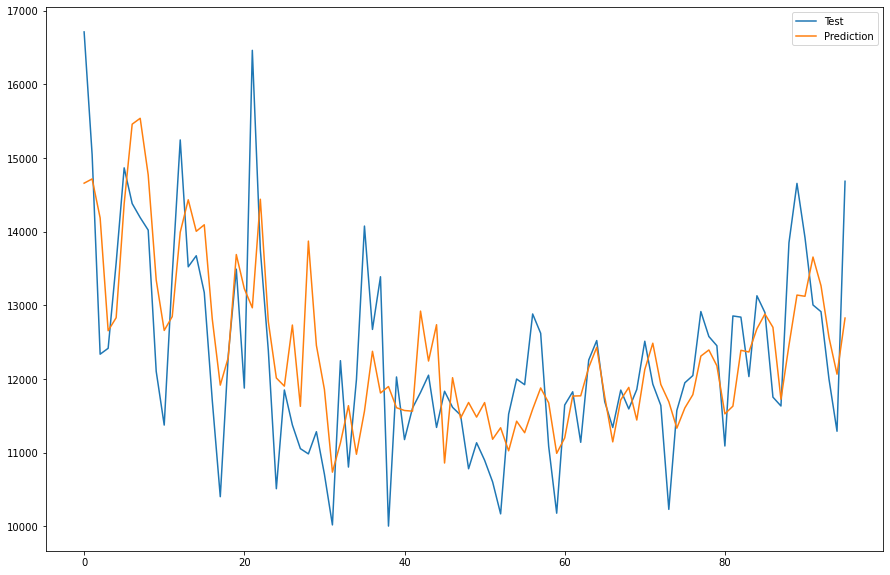

In [976]:
plt.figure(figsize=(15,10))
plt.plot(Y_test_unscal,label = 'Test')
plt.plot(Predict_unscal, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [977]:
MAPE(Y_test_unscal,Predict_unscal)

6.401882800706826

In [978]:
mean_squared_error(Y_test_unscal,Predict_unscal)

1020261.9302005172

In [979]:
np.sqrt(mean_squared_error(Y_test_unscal,Predict_unscal))

1010.0801602845772

In [980]:
mean_absolute_error(Y_test_unscal,Predict_unscal)

787.1500854492188

In [982]:
model.summary()

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 50)                8400      
                                                                 
 dense_107 (Dense)           (None, 1)                 51        
                                                                 
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


# CNN

In [983]:
from functools import partial
import tensorflow as tf
from tensorflow import keras

## Data preparation 

In [984]:
# univariate data preparation
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [985]:
L = len(df)
Y = df.iloc[0:L,2].to_list()

In [986]:
n_steps = 15
# split into samples
X, Y = split_sequence(Y, n_steps)

In [987]:
X.shape
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [988]:
X.shape

(788, 15, 1)

In [989]:
X_train = X[:700,:,:]
X_test= X[700:,:,:]
Y_train=Y[:700]
Y_test=Y[700:]

In [990]:
X_train.shape

(700, 15, 1)

## Building 1-Dimension CNN Univariate

In [1001]:
# define model
model = Sequential()
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model.add(Conv1D(filters=64, kernel_size=2, activation='elu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=2, activation='elu'))
model.add(Flatten())
model.add(Dense(50, activation='elu',kernel_initializer="he_normal"))
model.add(Dense(1))

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='mae')

In [1002]:
# fit model
model.fit(X_train, Y_train, epochs=1000, verbose=0)

In [1003]:
yhat = model.predict(X_test, verbose=0)

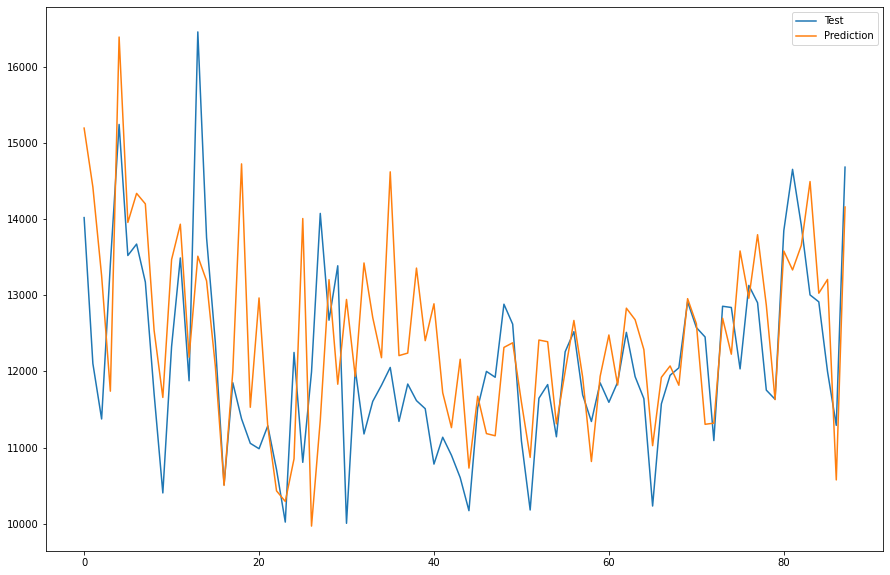

In [1004]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(yhat, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [1006]:
MAPE(Y_test,yhat)

11.397254647362592

In [1007]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,yhat)

1410799.5665968223

In [1008]:
np.sqrt(mean_squared_error(Y_test,yhat))

1187.7708392601758

In [1010]:
mean_absolute_error(Y_test,yhat)

874.8723033558239

In [1011]:
model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_43 (Conv1D)          (None, 14, 64)            192       
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 7, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_44 (Conv1D)          (None, 6, 128)            16512     
                                                                 
 flatten_25 (Flatten)        (None, 768)               0         
                                                                 
 dense_110 (Dense)           (None, 50)                38450     
                                                                 
 dense_111 (Dense)           (None, 1)                 51        
                                                    